In [10]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [11]:
# Read comma separated data
data = np.loadtxt(os.path.join('ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples
print(m)

97


In [12]:
def plotData(x, y):
    
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x, y, 'g.', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

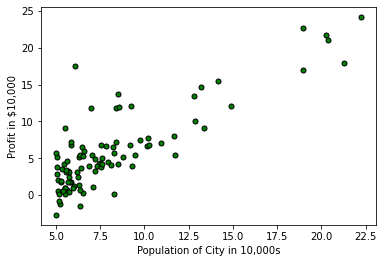

In [13]:
plotData(X,y)

In [14]:
# Add a column of ones to X to represent the intercepts. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

In [15]:
print(X[:5])#check the data
print(y[:5])

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]
[17.592   9.1302 13.662  11.854   6.8233]


In [16]:
#code for computing cost of using particular theta values
def computeCost(X, y, theta):
    """
    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    
    m = y.size  
    J = 0
    h=np.dot(X,np.transpose(theta))
    for i in range(m):
        J+= ((h[i]-y[i])**2)
    J=J/(2*m)
    return J
A = 0.0
B = 0.0
theta=np.array([A, B])
J = computeCost(X, y, theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)

With theta = [0, 0] 
Cost computed = 32.07


In [17]:
#code of gradient descent function(for optimization)
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    cp = theta.copy()
    
    J_history = [] 
    
    for i in range(num_iters):
        h=np.dot(X,np.transpose(cp))
        cp=cp-(alpha)*np.dot(h-y,X)/m
        J_history.append(computeCost(X, y, cp))
    
    return cp, J_history
A = 0.0
B = 0.0
theta = np.array([A,B]) 

# some gradient descent settings ,can be changed  
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: -3.6303, 1.1664


For population = 35000.0
we predict a profit of 4521.00



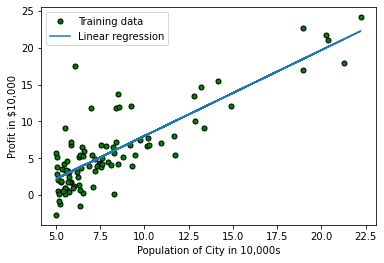

In [19]:
#assign values of theta obtained on optimization and visualize the line obtained on linear regression
A = -3.6303
B = 1.1664
theta = np.array([A,B])
cp=theta.copy()
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, cp), '-')
pyplot.legend(['Training data', 'Linear regression']);
population_size = 35000    #obtain predictions by varying the X variable
population_size = population_size/10000

predict1 = np.dot([1, population_size], cp)
print('For population = ' + str(population_size*10000))
print('we predict a profit of {:.2f}\n'.format(predict1*10000))